Root Finding
===========

In [1]:
from IPython.core.display import display, HTML
from matplotlib import pyplot, rcParams

display(HTML("<style>.container { width:108ch !important; }</style>"))

In [2]:
import scipy

class DemonstrationFunction:
    """
    A callable defining a polynomial used in the subsequent demonstrations.
    
    We use a class instead of a function so that we can spy on the
    solving process.
    
    Attributes:
        coefficients (scipy.array(dtype=float)):    The coefficients of the
            polynomial. The n-th entry is the coefficient in front of x^n.
        
        evaluations (dict('x'=[], 'y'=[]):    Stores the points where the
            function was evaluated and the result of the evaluation.
    """
    
    def __init__(self, coefficients):
        """Create a polynomial with the specified coefficients."""
        
        self.coefficients = coefficients
        self.evaluations = dict(x=[], y=[])
        
    def __call__(self, x):
        """Evaluate the polynomial at the given abscissa."""
        
        x_to_n = 1.0
        result = 0.0
        for coefficient in self.coefficients:
            result += coefficient * x_to_n
            x_to_n *= x
        
        self.evaluations['x'].append(x)
        self.evaluations['y'].append(result)
        return result
    
    def derivative(self, x, deriv_order=1):
        """Return the derivative of the specified order at x."""
        
        deriv_factor = scipy.math.factorial(deriv_order)
        result = 0.0
        x_to_n = 1.0
        for x_power, coefficient in enumerate(
            self.coefficients[deriv_order:]
        ):
            result += deriv_factor * coefficient * x_to_n
            deriv_factor *= (x_power + deriv_order + 1) / (x_power + 1)
            x_to_n *= x
            
        return result
    
    def reset_evaluations(self):
        """Clear the current function evaluation history."""
        
        self.evaluations = dict(x=[], y=[])

**Plotting the function**

In [ ]:
import matplotlib
from matplotlib import pyplot

def setup_readable_plots():
    """Configure matplotlib to create readable plots."""
    
    matplotlib.rc('figure', figsize=(15,6))
    matplotlib.rc('font', size=24)
    
def plot(function, derivative, plot_range, tangent_x=-0.5):
    """Plot the given function in the given range."""
    
    plot_x = scipy.linspace(*plot_range, 1000)
    tangent_line = lambda x: (function(tangent_x)
                              +
                              derivative(tangent_x) * (x - tangent_x)) 
    
    pyplot.axhline(0.0, color='black', linewidth=3)
    pyplot.plot(plot_x,
                function(plot_x),
                color='red',
                linewidth=3,
                label='f(x)')
    pyplot.plot(plot_x,
                tangent_line(plot_x),
                color='blue',
                linewidth=2,
                label='tangent')
    pyplot.xlabel('x')
    pyplot.ylabel('y')
    pyplot.legend()

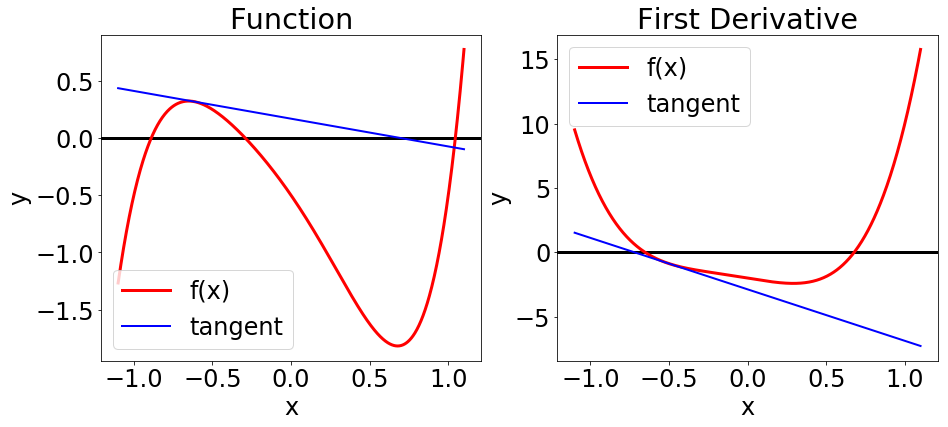

In [3]:
if __name__ == '__main__':
    coefficients = scipy.linspace(-3, 2, 6)
    coefficients[0] += 2.5
    polynomial = DemonstrationFunction(coefficients)

    setup_readable_plots()
    
    pyplot.subplot(1, 2, 1)
    plot(polynomial, polynomial.derivative, (-1.1, 1.1), tangent_x=-0.619)
    pyplot.title('Function')
    
    pyplot.subplot(1, 2, 2)
    plot(polynomial.derivative,
         lambda x: polynomial.derivative(x, 2),
         (-1.1, 1.1))
    pyplot.title('First Derivative')

Finding Roots
===========

[Here is the documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html#root-finding)

Let's display what the solver is doing
----------------------------------------------------

In [5]:
def plot_solver_iterations(function, evaluations, plot_range=None):
    """Create a plot demonstrating the root finding iterations."""
    
    if plot_range is None:
        plot_range = min(evaluations['x']), max(evaluations['x'])
        
    plot_x = scipy.linspace(*plot_range, 1000)
    pyplot.plot(plot_x,
                function(plot_x),
                color='black',
                linewidth=2,
                label='f(x)')
    pyplot.axhline(0.0, color='blue', linewidth=2)
    offsets = {var: evaluations[var][1:] - evaluations[var][:-1]
               for var in ['x', 'y']}
    
    pyplot.quiver(evaluations['x'][:-1],
                  evaluations['y'][:-1],
                  offsets['x'],
                  offsets['y'],
                  color='red',
                  width=5e-3,
                  angles='xy',
                  scale_units='xy',
                  scale=1,
                  label='iterations')
    pyplot.xlabel('x')
    pyplot.ylabel('y')
    pyplot.legend()

Newton's method
-------------------------

[Here is the documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html#scipy.optimize.newton)

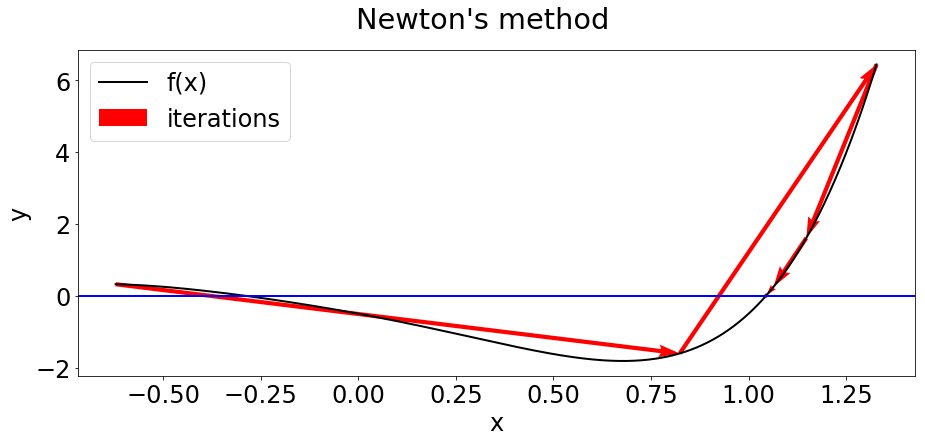

In [6]:
polynomial.reset_evaluations()
solution = scipy.optimize.newton(func=polynomial,
                                 x0=-0.622,
                                 fprime=polynomial.derivative)

solver_evaluations = {var:scipy.array(polynomial.evaluations[var])
                      for var in ['x', 'y']}
plot_solver_iterations(polynomial, solver_evaluations)
pyplot.suptitle("Newton's method");

Secant method
----------------------


Text(0.5,0.98,'Secant method')

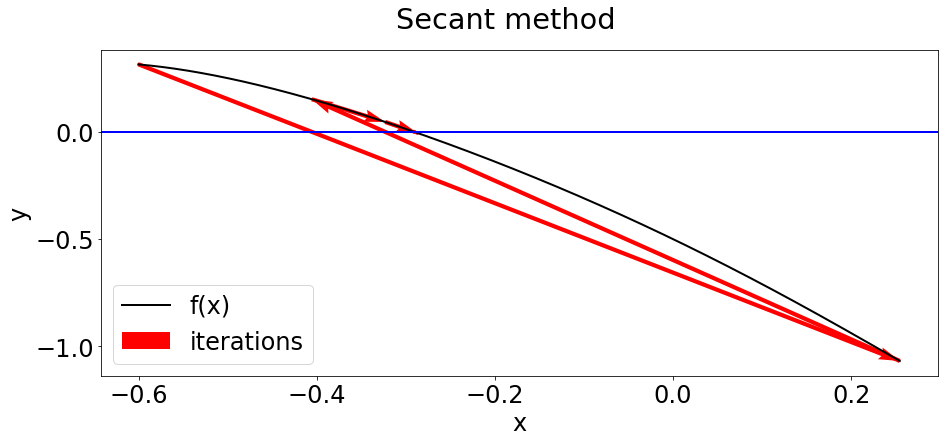

In [7]:
polynomial.reset_evaluations()
solution = scipy.optimize.newton(func=polynomial,
                                 x0=-0.6)

solver_evaluations = {var:scipy.array(polynomial.evaluations[var])
                      for var in ['x', 'y']}
plot_solver_iterations(polynomial, solver_evaluations)
pyplot.suptitle('Secant method')

Numerical Integration
==================

[See the documentation](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)

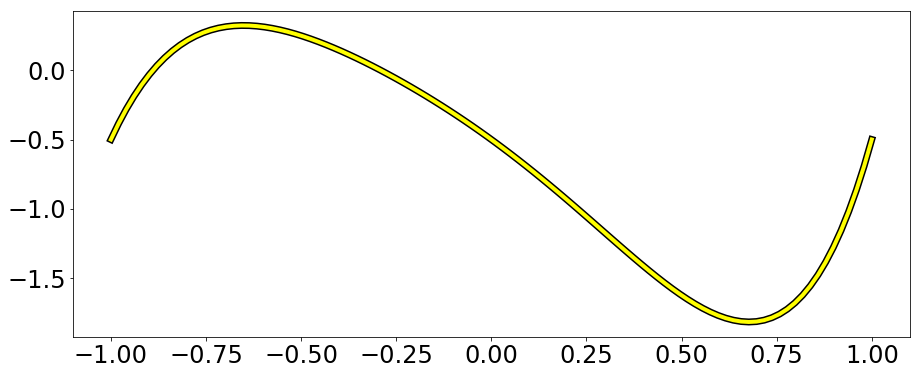

In [8]:
from scipy import integrate

quad_integral = lambda x: (integrate.quad(polynomial.derivative,
                                          0.0,
                                          x)[0]
                           +
                           polynomial(0.0))
plot_x = scipy.linspace(-1.0, 1.0, 100)
pyplot.plot(plot_x, polynomial(plot_x), color='black', linewidth=7)
pyplot.plot(plot_x,
            [quad_integral(x) for x in plot_x],
            color='yellow',
            linewidth=4)

Ordinary Differential Equations
=========================

[See the documentation](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html#ordinary-differential-equations-odeint)

In one dimension
------------------------

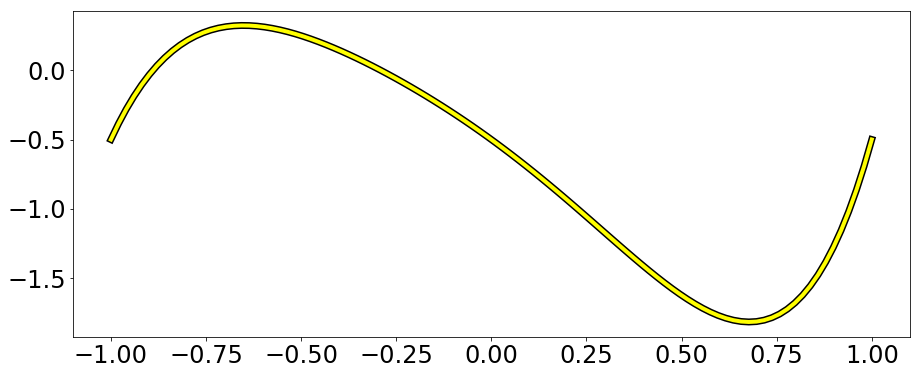

In [9]:
integrated = integrate.odeint(lambda y, x: polynomial.derivative(x),
                              polynomial(-1.0),
                              plot_x)
pyplot.plot(plot_x, polynomial(plot_x), color='black', linewidth=7)
pyplot.plot(plot_x, integrated, color='yellow', linewidth=4);

Damped Harmonic Oscillator
-----------------------------------------

Standard way to express ODE:

$ \vec{y} = \left(\begin{array}{c} x \\ \frac{dx}{dt}\end{array}\right)$

Then:

$ \frac{d\vec{y}}{dt} = \left(\begin{array}{c} y_1 \\ -k y_0 - f y_1\end{array}\right)$

In [10]:
def damped_oscillator_eom(offset_velocity,
                          time,
                          restoring_constant,
                          damping_coefficient):
    """
    Equation of motion for damped harmonic oscillator.
    Args:
        offset_speed (2-element array):    The current offset and velocity
            of the oscillator.
            
        time:    The time wheth the equation of motion is being evaluated 
            (ignored).
            
        restoring_consant (float):    The constant defining the restoring 
            force.
            
        damping_coefficient (float):    The coefficient defining the damping 
            force.
    
    Returns:
        2-element array:
            The time derivative of the displacement and speed.
    """
    
    offset, velocity = offset_velocity
    return [velocity,
            -restoring_constant * offset - damping_coefficient * velocity]

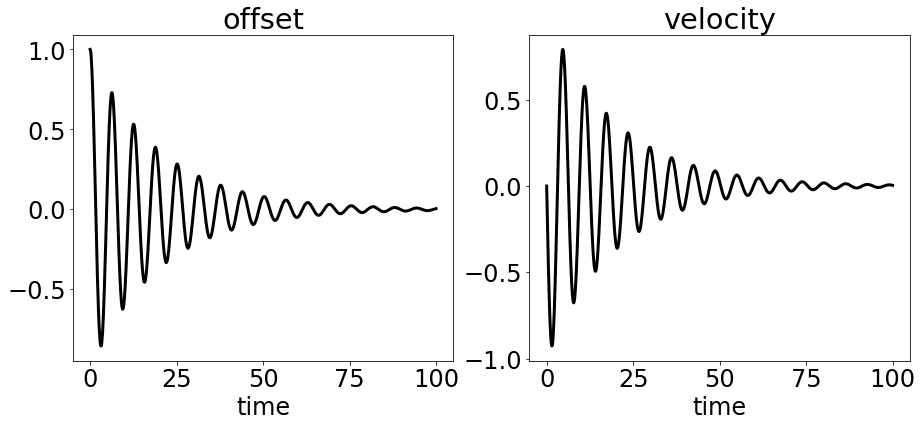

In [11]:
plot_t = scipy.linspace(0, 100, 1000)
solution = integrate.odeint(damped_oscillator_eom,
                            [1.0, 0.0],
                            plot_t,
                            args=(1.0, 0.1))

pyplot.subplot(1, 2, 1)
pyplot.plot(plot_t, solution[:, 0], linewidth=3, color='black')
pyplot.xlabel('time')
pyplot.title('offset')

pyplot.subplot(1, 2, 2)
pyplot.plot(plot_t, solution[:, 1], linewidth=3, color='black')
pyplot.xlabel('time')
pyplot.title('velocity');